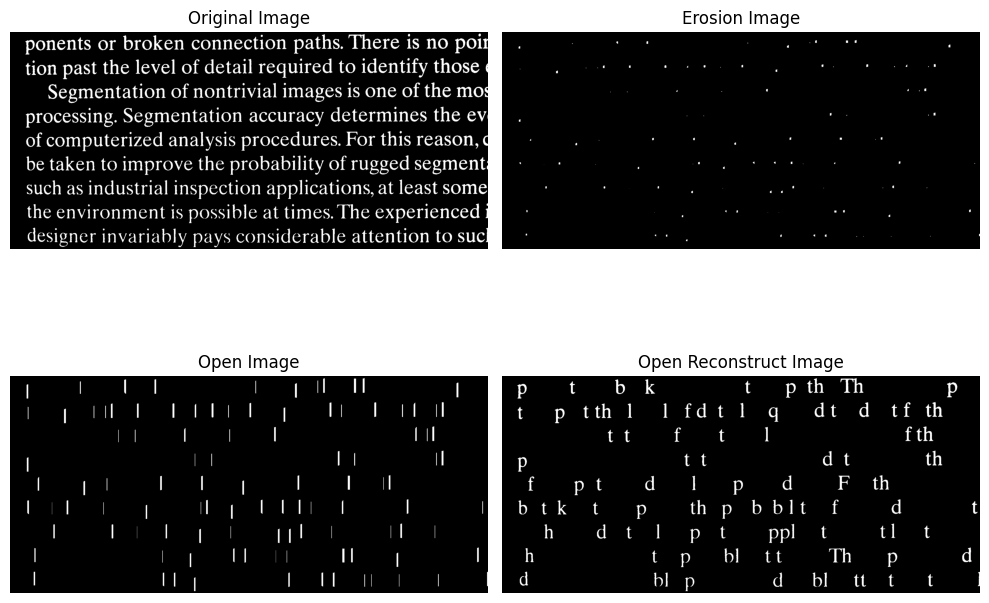

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from function_binary import erosion, dilation, reconstruction_opening

# 读取图像
imgname = r".\test_images\Fig0929(a)(text_image).tif"
img = cv2.imread(imgname)[:, :, 0]

# 设定结构元素
kernel_erose = np.ones((51, 1), np.int32)

# 进行腐蚀操作
img_erose = erosion(img, kernel_erose)

# 进行开操作
img_open = dilation(img_erose, kernel_erose)

# 进行重建开操作
kernel_reconstruct = np.ones((3, 3), dtype=np.int32)
img_reconstruct = reconstruction_opening(img_erose, img,kernel_reconstruct)

# 创建子图

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 原图
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')  # 不显示坐标轴

# 腐蚀图像
axs[0, 1].imshow(img_erose, cmap='gray')
axs[0, 1].set_title("Erosion Image")
axs[0, 1].axis('off')  # 不显示坐标轴

# 开操作图像
axs[1, 0].imshow(img_open, cmap='gray')
axs[1, 0].set_title("Open Image")
axs[1, 0].axis('off')  # 不显示坐标轴

# 重建开操作图像
axs[1, 1].imshow(img_reconstruct, cmap='gray')
axs[1, 1].set_title("Open Reconstruct Image")
axs[1, 1].axis('off')  # 不显示坐标轴

# 调整布局
plt.tight_layout()

# 创建 result 文件夹（如果不存在的话）
output_dir = r".\result"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# 保存图形到 result 文件夹
plt.savefig(os.path.join(output_dir, "Fig0929(a)(text_image)_output_figure.png"), bbox_inches='tight')

plt.show()








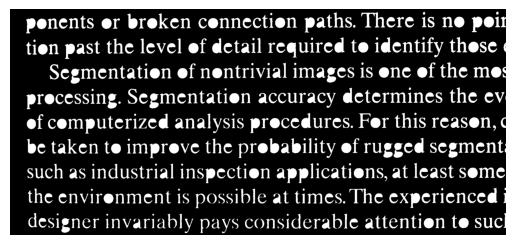

In [7]:
# 读取图像
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from function_binary import erosion, dilation, reconstruction_opening

imgname = r".\test_images\Fig0929(a)(text_image).tif"
img = cv2.imread(imgname)[:, :, 0]


#孔洞填充
mask = 255-img
# 构造Marker图像
marker = np.zeros_like(img)
marker[0, :] = 255-img[0,:]
marker[-1, :] = 255-img[-1,:]
marker[:, 0] = 255-img[:,0]
marker[:, -1] = 255-img[:,-1]
marker_0 = marker.copy()

# 进行重建开操作
kernel_reconstruct = np.ones((3, 3), dtype=np.int32) #这个核有什么讲究吗

edge =  reconstruction_opening(marker, mask, kernel_reconstruct)     
result = 255-edge                 


#边缘提取
#绘制图像
plt.imshow(result, cmap='gray')
plt.axis('off')  # 关闭坐标轴
plt.show()


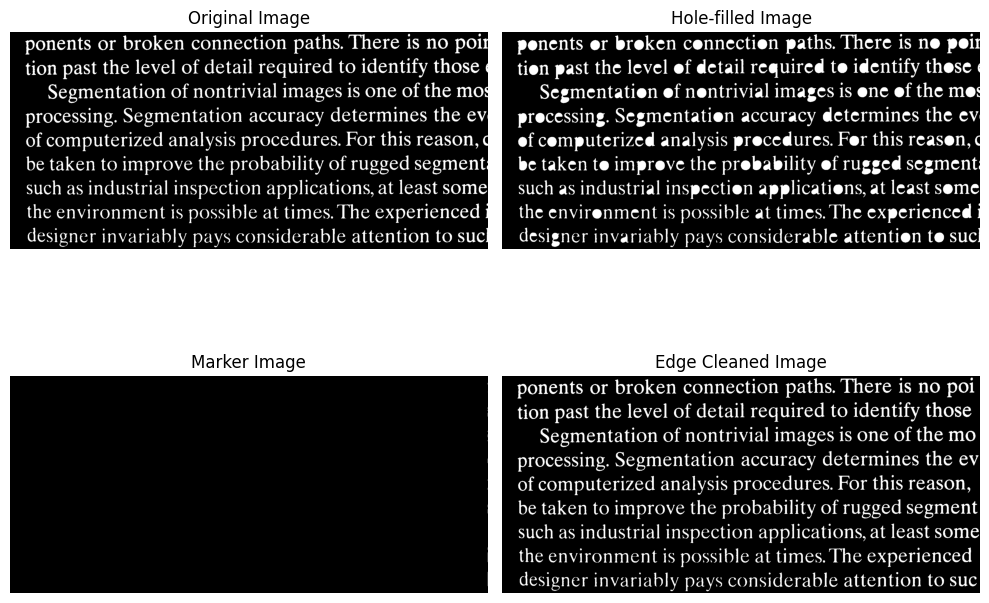

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from function_binary import erosion, dilation, reconstruction_opening

# 读取图像
imgname = r".\test_images\Fig0929(a)(text_image).tif"
img = cv2.imread(imgname)[:, :, 0]

# 进行重建开操作
kernel_reconstruct = np.ones((3, 3), dtype=np.int32) #这个核有什么讲究吗

marker = np.zeros_like(img)
marker[:,-1:] = img[:,-1:]
edge_cleaned = img - reconstruction_opening(marker,img,kernel_reconstruct)

# 创建子图

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 原图
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')  # 不显示坐标轴

# 腐蚀图像
axs[0, 1].imshow(result, cmap='gray')
axs[0, 1].set_title("Hole-filled Image")
axs[0, 1].axis('off')  # 不显示坐标轴

# 开操作图像
axs[1, 0].imshow(marker, cmap='gray')
axs[1, 0].set_title("Marker Image")
axs[1, 0].axis('off')  # 不显示坐标轴

# 重建开操作图像
axs[1, 1].imshow(edge_cleaned, cmap='gray')
axs[1, 1].set_title("Edge Cleaned Image")
axs[1, 1].axis('off')  # 不显示坐标轴

# 调整布局
plt.tight_layout()

# 创建 result 文件夹（如果不存在的话）
output_dir = r".\result"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# 保存图形到 result 文件夹
plt.savefig(os.path.join(output_dir, "text_image_output_2_figure.png"), bbox_inches='tight')

plt.show()
